## Regressão logística

- Nesse exemplo iremos aplicar os conhecimentos de regressão logística aprendidos. A base que será utilizada é para identificar análise do tipo de cancer(maligno ou beligno)

### Link para a base

Base: https://www.kaggle.com/datasets/erdemtaha/cancer-data

## Bibliotecas

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Importação

In [33]:
df_cancer = pd.read_csv('C:/Users/jeffe/OneDrive/Área de Trabalho/Documentos/IA_em_Pauta/Regressão logística/Cancer_Data.csv',sep=',')

In [26]:
df_cancer = df_cancer.copy()

## Análise da base

In [4]:
df_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
df_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Entendendo as colunas

| Coluna (original)          | Tradução em português                            |
|---------------------------|--------------------------------------------------|
| `id`                      | ID                                               |
| `diagnosis`               | Diagnóstico (M = Maligno, B = Benigno)          |
| `radius_mean`             | Raio médio do núcleo celular                     |
| `texture_mean`            | Textura média (variação nos tons de cinza)      |
| `perimeter_mean`          | Perímetro médio                                  |
| `area_mean`               | Área média                                       |
| `smoothness_mean`         | Suavidade média (uniformidade dos contornos)    |
| `compactness_mean`        | Compacidade média                                |
| `concavity_mean`          | Concavidade média (profundidade de reentrâncias)|
| `concave points_mean`     | Pontos côncavos médios                           |
| `symmetry_mean`           | Simetria média                                   |
| `fractal_dimension_mean`  | Dimensão fractal média                           |
| `radius_se`               | Erro padrão do raio                              |
| `texture_se`              | Erro padrão da textura                           |
| `perimeter_se`            | Erro padrão do perímetro                         |
| `area_se`                 | Erro padrão da área                              |
| `smoothness_se`           | Erro padrão da suavidade                         |
| `compactness_se`          | Erro padrão da compacidade                       |
| `concavity_se`            | Erro padrão da concavidade                       |
| `concave points_se`       | Erro padrão dos pontos côncavos                  |
| `symmetry_se`             | Erro padrão da simetria                          |
| `fractal_dimension_se`    | Erro padrão da dimensão fractal                  |
| `radius_worst`            | Maior valor do raio observado                    |
| `texture_worst`           | Maior valor da textura observado                 |
| `perimeter_worst`         | Maior valor do perímetro                         |
| `area_worst`              | Maior valor da área                              |
| `smoothness_worst`        | Maior valor da suavidade                         |
| `compactness_worst`       | Maior valor da compacidade                       |
| `concavity_worst`         | Maior valor da concavidade                       |
| `concave points_worst`    | Maior valor dos pontos côncavos                  |
| `symmetry_worst`          | Maior valor da simetria                          |
| `fractal_dimension_worst` | Maior valor da dimensão fractal                  |


In [12]:
df_cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
# Não temos valores nulos, apenas a coluna sem nome que iremos excluir
df_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [34]:
# Excluindo a coluna Unnamed
df_cancer.drop(columns=['Unnamed: 32', 'id'],inplace=True)

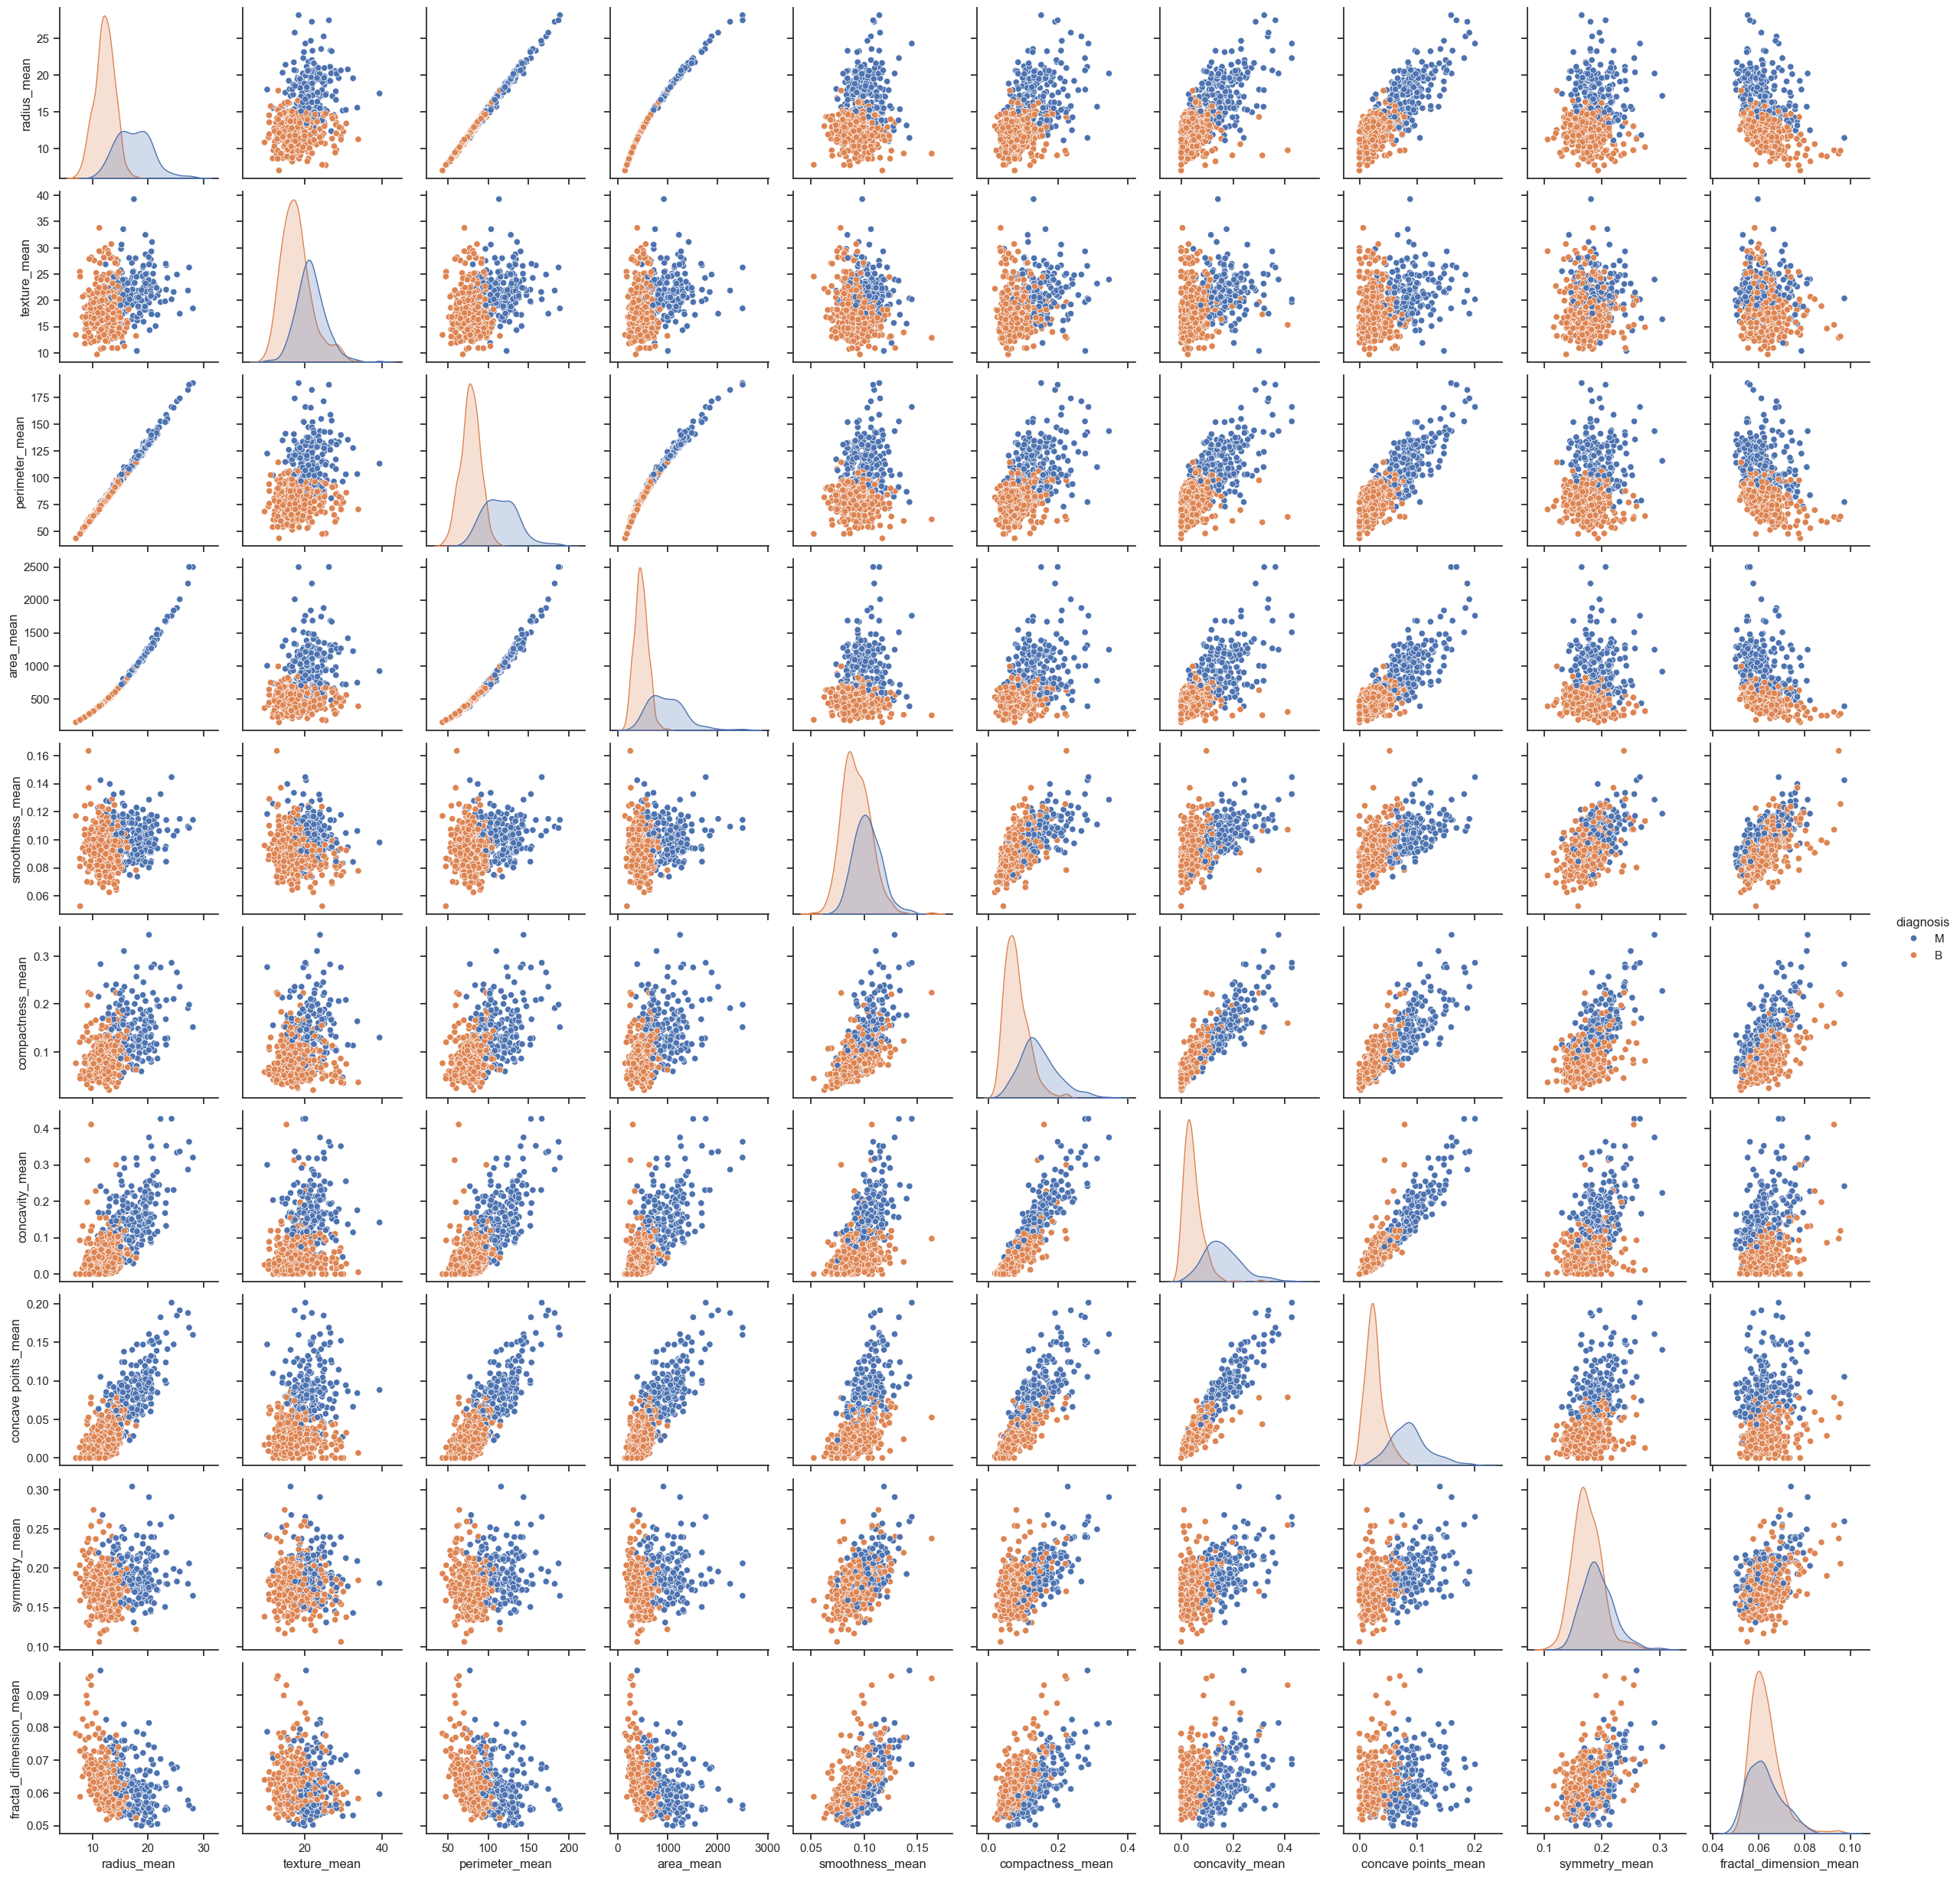

In [18]:
# Verificando as variáveis médias na distribuição

sns.set_theme(style='ticks')
sns.pairplot(df_cancer[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','diagnosis']],hue='diagnosis')


In [35]:
# Alterando a coluna diagnóstico para 1(Maligno) e 0(Benigno)
df_cancer['diagnosis'] = df_cancer['diagnosis'].map({"M":1,"B":0})

## Preparando e treinando o modelo

In [36]:
# Separando nas variáveis X e y para treinarmos o modelo
X  = df_cancer.drop(columns=['diagnosis'],axis=1)
y = df_cancer['diagnosis']

In [37]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [38]:
model = LogisticRegression(max_iter=1000)

In [39]:
model.fit(X_train, y_train)

c:\Users\jeffe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [41]:
y_predict = model.predict(X_test)

In [43]:
y_predict

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [44]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int64

In [46]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [47]:
cm = confusion_matrix(y_test,y_predict)

In [48]:
cm

array([[106,   2],
       [  2,  61]], dtype=int64)

## Conclusão

o modelo de regressao logistica apresentou excelente desempenho, com métricas na girando em torno de 98% e uma matriz de confusão com valores baixos para falso positivo e falso negativo